In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('inputs/USDJPY_M15.csv', sep='\t', names=('date', 'time', 'open', 'high', 'low', 'close'), usecols=[0, 1, 2, 3, 4, 5], header=1)
data = data[:-1]
data['datetime'] = pd.to_datetime(data['date']  + ' ' + data['time'])
data.drop(['date', 'time'], axis=1, inplace=True)
data

,open,high,low,close,datetime
0,107.520,107.545,107.469,107.540,2020-04-01 00:15:00
1,107.540,107.544,107.476,107.492,2020-04-01 00:30:00
2,107.492,107.519,107.465,107.481,2020-04-01 00:45:00
3,107.481,107.549,107.481,107.547,2020-04-01 01:00:00
4,107.549,107.549,107.514,107.532,2020-04-01 01:15:00
...,...,...,...,...,...
27070,109.271,109.282,109.258,109.269,2021-05-04 07:30:00
27071,109.269,109.287,109.257,109.283,2021-05-04 07:45:00
27072,109.283,109.302,109.264,109.296,2021-05-04 08:00:00
27073,109.295,109.353,109.289,109.347,2021-05-04 08:15:00


In [3]:
# all_data = pd.merge(data, ni225, on='datetime', suffixes=['', '_ni225']).drop(['date_ni225', 'time_ni225'], axis=1)
all_data = data.copy()
all_data

,open,high,low,close,datetime
0,107.520,107.545,107.469,107.540,2020-04-01 00:15:00
1,107.540,107.544,107.476,107.492,2020-04-01 00:30:00
2,107.492,107.519,107.465,107.481,2020-04-01 00:45:00
3,107.481,107.549,107.481,107.547,2020-04-01 01:00:00
4,107.549,107.549,107.514,107.532,2020-04-01 01:15:00
...,...,...,...,...,...
27070,109.271,109.282,109.258,109.269,2021-05-04 07:30:00
27071,109.269,109.287,109.257,109.283,2021-05-04 07:45:00
27072,109.283,109.302,109.264,109.296,2021-05-04 08:00:00
27073,109.295,109.353,109.289,109.347,2021-05-04 08:15:00


In [4]:
# extract features from date
all_data['day'] = [i.day for i in all_data['datetime']]
all_data['month'] = [i.month for i in all_data['datetime']]
all_data['year'] = [i.year for i in all_data['datetime']]
all_data['day_of_week'] = [i.dayofweek for i in all_data['datetime']]
all_data['day_of_year'] = [i.dayofyear for i in all_data['datetime']]

all_data['hour'] = [i.hour for i in all_data['datetime']]
all_data['minute'] = [i.minute for i in all_data['datetime']]

all_data

,open,high,low,close,datetime,day,month,year,day_of_week,day_of_year,hour,minute
0,107.520,107.545,107.469,107.540,2020-04-01 00:15:00,1,4,2020,2,92,0,15
1,107.540,107.544,107.476,107.492,2020-04-01 00:30:00,1,4,2020,2,92,0,30
2,107.492,107.519,107.465,107.481,2020-04-01 00:45:00,1,4,2020,2,92,0,45
3,107.481,107.549,107.481,107.547,2020-04-01 01:00:00,1,4,2020,2,92,1,0
4,107.549,107.549,107.514,107.532,2020-04-01 01:15:00,1,4,2020,2,92,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...
27070,109.271,109.282,109.258,109.269,2021-05-04 07:30:00,4,5,2021,1,124,7,30
27071,109.269,109.287,109.257,109.283,2021-05-04 07:45:00,4,5,2021,1,124,7,45
27072,109.283,109.302,109.264,109.296,2021-05-04 08:00:00,4,5,2021,1,124,8,0
27073,109.295,109.353,109.289,109.347,2021-05-04 08:15:00,4,5,2021,1,124,8,15


In [5]:
# dataset = all_data[['open', 'high', 'low', 'close', 'tickvol', 'day', 'month', 'year', 'day_of_week', 'day_of_year', 'hour', 'minute', 'open_ni225', 'high_ni225', 'low_ni225', 'close_ni225', 'tickvol_ni225']]
dataset = all_data[['open', 'high', 'low', 'close', 'day', 'month', 'year', 'day_of_week', 'day_of_year', 'hour', 'minute']]
dataset


,open,high,low,close,day,month,year,day_of_week,day_of_year,hour,minute
0,107.520,107.545,107.469,107.540,1,4,2020,2,92,0,15
1,107.540,107.544,107.476,107.492,1,4,2020,2,92,0,30
2,107.492,107.519,107.465,107.481,1,4,2020,2,92,0,45
3,107.481,107.549,107.481,107.547,1,4,2020,2,92,1,0
4,107.549,107.549,107.514,107.532,1,4,2020,2,92,1,15
...,...,...,...,...,...,...,...,...,...,...,...
27070,109.271,109.282,109.258,109.269,4,5,2021,1,124,7,30
27071,109.269,109.287,109.257,109.283,4,5,2021,1,124,7,45
27072,109.283,109.302,109.264,109.296,4,5,2021,1,124,8,0
27073,109.295,109.353,109.289,109.347,4,5,2021,1,124,8,15


In [6]:
dataset['y'] = dataset['high'].shift(-1)
dataset[['y', 'high']]

,y,high
0,107.544,107.545
1,107.519,107.544
2,107.549,107.519
3,107.549,107.549
4,107.682,107.549
...,...,...
27070,109.287,109.282
27071,109.302,109.287
27072,109.353,109.302
27073,109.349,109.353


In [7]:
for i in range(1, 13):
    dataset['shift%s'%i] = dataset['high'].shift(i)

dataset['sma5'] = dataset['high'].rolling(5).mean()
dataset['sma15'] = dataset['high'].rolling(15).mean()
dataset

,open,high,low,close,day,month,year,day_of_week,day_of_year,hour,...,shift5,shift6,shift7,shift8,shift9,shift10,shift11,shift12,sma5,sma15
0,107.520,107.545,107.469,107.540,1,4,2020,2,92,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,107.540,107.544,107.476,107.492,1,4,2020,2,92,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,107.492,107.519,107.465,107.481,1,4,2020,2,92,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,107.481,107.549,107.481,107.547,1,4,2020,2,92,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,107.549,107.549,107.514,107.532,1,4,2020,2,92,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.5412,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,109.271,109.282,109.258,109.269,4,5,2021,1,124,7,...,109.248,109.248,109.248,109.260,109.263,109.253,109.232,109.205,109.2740,109.242200
27071,109.269,109.287,109.257,109.283,4,5,2021,1,124,7,...,109.252,109.248,109.248,109.248,109.260,109.263,109.253,109.232,109.2810,109.251800
27072,109.283,109.302,109.264,109.296,4,5,2021,1,124,8,...,109.256,109.252,109.248,109.248,109.248,109.260,109.263,109.253,109.2902,109.261067
27073,109.295,109.353,109.289,109.347,4,5,2021,1,124,8,...,109.295,109.256,109.252,109.248,109.248,109.248,109.260,109.263,109.3018,109.270933


https://colab.research.google.com/drive/1zChMV6D-BrLVTQWgKxlchP2BcPDViBVx#scrollTo=1uIqDdzT-DV5&uniqifier=1

In [8]:
dataset = dataset[100:-1]
dataset

,open,high,low,close,day,month,year,day_of_week,day_of_year,hour,...,shift5,shift6,shift7,shift8,shift9,shift10,shift11,shift12,sma5,sma15
100,107.145,107.199,107.117,107.122,2,4,2020,3,93,1,...,107.158,107.186,107.193,107.137,107.131,107.160,107.053,107.183,107.1356,107.156067
101,107.122,107.154,107.074,107.150,2,4,2020,3,93,1,...,107.131,107.158,107.186,107.193,107.137,107.131,107.160,107.053,107.1402,107.150933
102,107.149,107.227,107.148,107.200,2,4,2020,3,93,1,...,107.065,107.131,107.158,107.186,107.193,107.137,107.131,107.160,107.1726,107.150667
103,107.200,107.258,107.185,107.215,2,4,2020,3,93,2,...,107.115,107.065,107.131,107.158,107.186,107.193,107.137,107.131,107.2012,107.155667
104,107.214,107.278,107.207,107.260,2,4,2020,3,93,2,...,107.168,107.115,107.065,107.131,107.158,107.186,107.193,107.137,107.2232,107.170667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27069,109.271,109.285,109.264,109.271,4,5,2021,1,124,7,...,109.248,109.248,109.260,109.263,109.253,109.232,109.205,109.163,109.2672,109.230733
27070,109.271,109.282,109.258,109.269,4,5,2021,1,124,7,...,109.248,109.248,109.248,109.260,109.263,109.253,109.232,109.205,109.2740,109.242200
27071,109.269,109.287,109.257,109.283,4,5,2021,1,124,7,...,109.252,109.248,109.248,109.248,109.260,109.263,109.253,109.232,109.2810,109.251800
27072,109.283,109.302,109.264,109.296,4,5,2021,1,124,8,...,109.256,109.252,109.248,109.248,109.248,109.260,109.263,109.253,109.2902,109.261067


In [9]:
dataset[['y', 'high']]

,y,high
100,107.154,107.199
101,107.227,107.154
102,107.258,107.227
103,107.278,107.258
104,107.272,107.278
...,...,...
27069,109.282,109.285
27070,109.287,109.282
27071,109.302,109.287
27072,109.353,109.302


In [10]:
dataset.isnull().any()

open           False
high           False
low            False
close          False
day            False
month          False
year           False
day_of_week    False
day_of_year    False
hour           False
minute         False
y              False
shift1         False
shift2         False
shift3         False
shift4         False
shift5         False
shift6         False
shift7         False
shift8         False
shift9         False
shift10        False
shift11        False
shift12        False
sma5           False
sma15          False
dtype: bool

In [11]:
X = dataset.drop(['y'], axis=1)
y = dataset['y']

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, train_test_split

In [13]:
import pickle

model = pickle.load(open('model.pkl','rb'))

In [14]:
y_pred = model.predict(X)
y_pred

array([107.18631, 107.18871, 107.25075, ..., 109.35063, 109.34145,
       109.45458], dtype=float32)

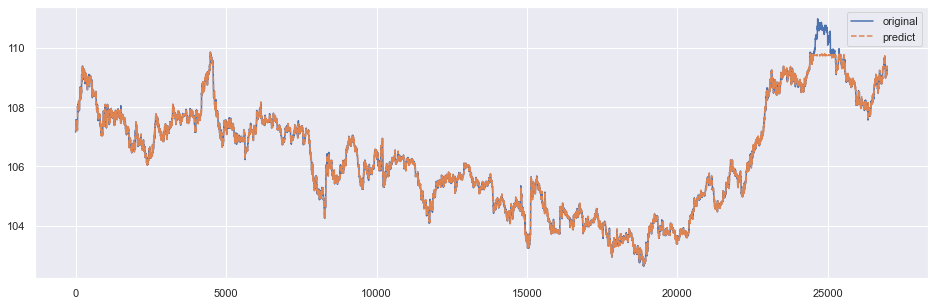

In [15]:
# y_ = np.concatenate([np.array([None for i in range(len(y_train)+len(y_val))]) , y_pred])
# y_ = pd.DataFrame(y_, index=X.index)

y = y.reset_index(drop=True)

plt.figure(figsize=(16,5))
plt.plot(y, label='original')
plt.plot(y_pred, '--', label='predict')
plt.legend()

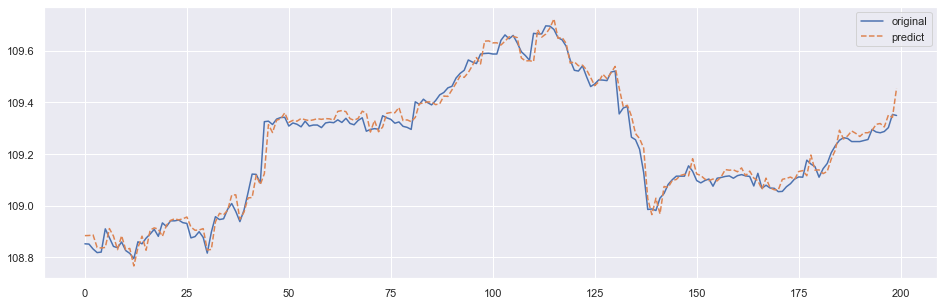

In [16]:
plt.figure(figsize=(16,5))
plt.plot(y[-200:].reset_index(drop=True), label='original')
plt.plot(y_pred[-200:], '--', label='predict')
plt.legend()

In [17]:
data

,open,high,low,close,datetime
0,107.520,107.545,107.469,107.540,2020-04-01 00:15:00
1,107.540,107.544,107.476,107.492,2020-04-01 00:30:00
2,107.492,107.519,107.465,107.481,2020-04-01 00:45:00
3,107.481,107.549,107.481,107.547,2020-04-01 01:00:00
4,107.549,107.549,107.514,107.532,2020-04-01 01:15:00
...,...,...,...,...,...
27070,109.271,109.282,109.258,109.269,2021-05-04 07:30:00
27071,109.269,109.287,109.257,109.283,2021-05-04 07:45:00
27072,109.283,109.302,109.264,109.296,2021-05-04 08:00:00
27073,109.295,109.353,109.289,109.347,2021-05-04 08:15:00
